<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793038-Jonathan_Garza/blob/main/Actividades%20Semana%206/Actividad_de_semana_6_Data_Analysis_with_Python_Modulo_3_Jonathan_Garza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico y de Estudios Superiores de Monterrey**

Maestría en Inteligencia Artificial Aplicada (MNA)

Ciencia y Analítica de Datos

**Actividad de Semana 6: Data Analysis with Python Módulo 3**

**Jonathan Garza Bennet - A01793038**

In [45]:
#Se importan las librerías requeridas para los ejercicios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Se descarga y crea la base de datos y se comienza con los ejercicios**

In [ ]:
#Establecer la url de donde se descargará el archivo csv para los ejercicios
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

#Descargar el archivo, asignarlo a un dataframe y asignar el nombre deseado de las columnas.
df = pd.read_csv(path)

#Visualizar el encabezado del archivo
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
#Se realiza una lista del tipo de datos que contiene el dataframe
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [ ]:
#Encontrar el tipo de variable de peak-rpm
print('El tipo de variable de la columna peak-rpm es: {}'.format(df['peak-rpm'].dtypes))

#Se puede calcular la correlación entre las variables int64 y float64 usando la función .corr()
df.corr()

El tipo de variable de la columna peak-rpm es: float64


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [ ]:
#Encontrar la correlación entre las columnas bore, stroke, compression-ratio, and horsepower
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


**Variables Continuas Numéricas**

(0.0, 53523.4232734545)

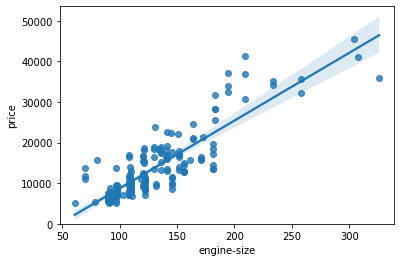

In [ ]:
#Se realiza una gráfica de dispersión entre engine-size y price para observar si existe alguna relación entre ellas
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

Se observa una relación positiva directa, cuando engine-size incrementa, price también. Se puede el valor de la correlación entre las dos columnas de la siguiente forma:

In [ ]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


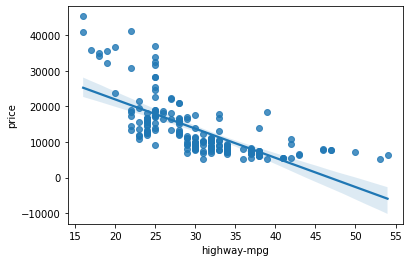

In [ ]:
#Se realiza una gráfica de dispersión entre highway mpg y price para observar si existe alguna relación entre ellas
sns.regplot(x="highway-mpg", y="price", data=df)

Se observa una relación negativa directa, cuando highway-mpg incrementa, price disminuye. Se puede el valor de la correlación entre las dos columnas de la siguiente forma:

In [ ]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


Relación Lineal Débil

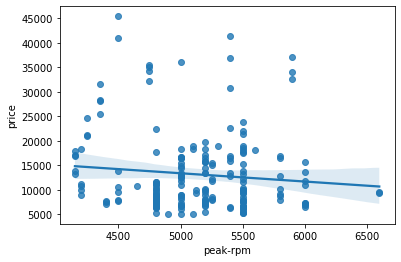

In [ ]:
#Se realiza una gráfica de dispersión entre peak-rpm y price para observar si existe alguna relación entre ellas
sns.regplot(x="peak-rpm", y="price", data=df)

Se observa que peak-rpm no es un buen predictor de price, la línea es casi horizontal y los datos están muy dispersos.  Se puede el valor de la correlación entre las dos columnas de la siguiente forma:

In [ ]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [ ]:
#Calcular la correlación entre stroke y price
df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


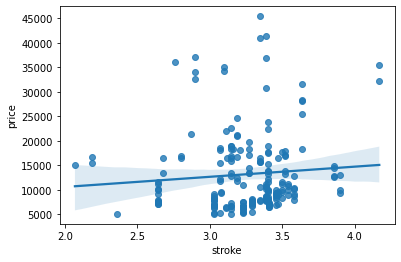

In [ ]:
#La correlación es muy baja, se realiza una gráfica para observar el resultado de una regresión lineal en una gráfica de dispersión
sns.regplot(x="stroke", y="price", data=df)

**Variables Categóricas**

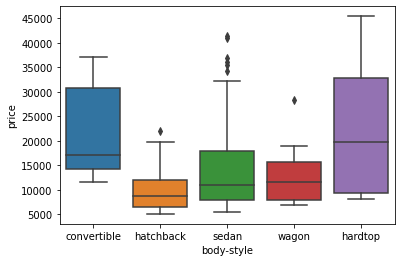

In [ ]:
#Verificar la correlación entre body-style y price por medio de un gráfico de cajas y bigotes
sns.boxplot(x="body-style", y="price", data=df)

La distribución de datos se encuentra traslapada entre todas las categorías, por lo que no es un buen predictor del precio

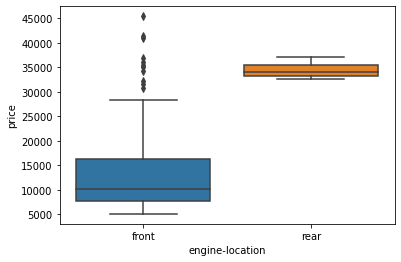

In [ ]:
#Verificar la correlación entre engine-location y price por medio de un gráfico de cajas y bigotes
sns.boxplot(x="engine-location", y="price", data=df)

La distribución de datos se encuentra separada entre todas las categorías, por lo que es un buen predictor del precio

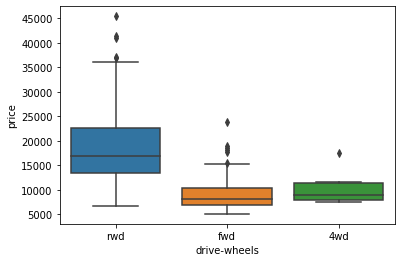

In [ ]:
#Verificar la correlación entre drive-wheels y price por medio de un gráfico de cajas y bigotes
sns.boxplot(x="drive-wheels", y="price", data=df)

Existe separación entre los datos por lo que drive-wheels pudiera se un buen predictor del precio

**Análisis Estadístico Descriptivo**

In [ ]:
#Se puede realizar el análisis estádístico descriptivo de un dataframe por medio de método describe
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [ ]:
#El método describe excluye a las variables object, se puede realizar el análisis sobre ellas de la siguiente forma
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [ ]:
#Se puede determinar cuantas veces aparece un valor o categoría en una serie de pandas de la siguiente forma (no se puede aplicar en todo el dataframe)
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [ ]:
#Se puede asignar el resultado de la operación a un nuevo dataframe
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [ ]:
#Se pueden repetir las operaciones anteriores y cambiar el nombre de la columna por value_counts
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [ ]:
#Ahora se cambian los nombres de los índices por drive-wheels
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
#Se realiza el mismo proceso pero ahora en engine-location
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


**Agrupamiento Básico**

In [35]:
#Agrupar los valores únicos de drive-wheels
print('Los valores únicos de drive wheels son: {}'.format(df['drive-wheels'].unique()))

#Se pueden seleccionar varias columnas y asignarlas a un nuevo dataframe
df_group_one = df[['drive-wheels','body-style','price']]

#Se agrupa el nuevo dataframe por drive-wheels y se calcula el precio promedio
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

Los valores únicos de drive wheels son: ['rwd' 'fwd' '4wd']


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [36]:
#Se realiza el mismo ejercicio pero con drive-wheels, body-style y price
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [38]:
#Se pueden organizar los resultados como una tabla de Excel donde las filas son drive-wheels y las columnas body-style
#Con esto se logra una visualización más fácil de los datos y de realiza por medio del método pivot
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [39]:
#A veces no se tienen valores en algunas celdas, se pueden reemplazar de la siguiente forma
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [40]:
#Agrupar las columnas body-style y price y calcular el promedio
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


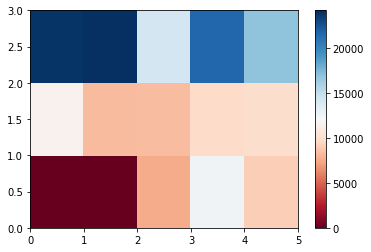

In [41]:
#Crear un heat map para visualizar los valores con una escala de color del dataframe grouped_pivot
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

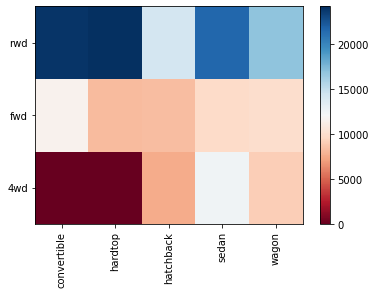

In [43]:
#La gráfica anterior no nos ayuda a visualizar la información de una forma más simple, de hecho es confusa, se procede a personalizar para mejorar el resultado
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#Se asignan los nombres de las etiquetas para que correspondan con el df
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#Se mueven los ticks y las etiquetas al centro
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#Se insertan las etiquetas
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#Se rota la etiqueta para mejor visualización en caso de que sea muy larga
plt.xticks(rotation=90)

#se asigna la paleta de colores 
fig.colorbar(im)

#Desplegar la gráfica
plt.show()

**Correlación y Causalidad**

Correlación de Pearson

La Correlación de Pearson mide la dependencia lineal entre dos variables X y Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

1: Correlación lineal positiva perfecta.

0: Sin correlación lineal, lo más probable es que las dos variables no se afecten entre sí.

-1: Correlación lineal negativa perfecta.

In [44]:
#La correlación de Pearson es el método por defecto de .corr()
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


**P-value**

¿Cuál es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa.

Por convención:

El valor p es < 0,001: decimos que hay pruebas sólidas de que la correlación es significativa.

El valor p es < 0,05: existe evidencia moderada de que la correlación es significativa.

El valor p es < 0,1: hay evidencia débil de que la correlación es significativa.

El valor p es > 0,1: no hay evidencia de que la correlación sea significativa.
Podemos obtener esta información usando el módulo "stats" en la biblioteca "scipy".

In [48]:
#Se calcula el coeficiente de correlación de Pearson entre wheel-base y price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("El coeficiente de correlación de Pearson es", pearson_coef, "  un valor P de =", p_value)  

El coeficiente de correlación de Pearson es 0.584641822265508   un valor P de = 8.076488270733218e-20


Dado que el valor p es < 0,001, la correlación entre wheel-base y price es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~0,585).

In [49]:
#Se calcula el coeficiente de correlación de Pearson entre horsepower y price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("El coeficiente de correlación de Pearson es", pearson_coef, " con un valor P de = ", p_value)  

El coeficiente de correlación de Pearson es 0.8095745670036559  con un valor P de = =  6.369057428260101e-48


Dado que el valor p es < 0,001, la correlación entre la horsepower y price es estadísticamente significativa y la relación lineal es bastante fuerte (~0,809, cerca de 1).

In [50]:
#Se calcula el coeficiente de correlación de Pearson entre length y price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("El coeficiente de correlación de Pearson es", pearson_coef, " con un valor P de = ", p_value)  

El coeficiente de correlación de Pearson es 0.6906283804483638  con un valor P de =  8.016477466159556e-30


Dado que el valor p es < 0,001, la correlación entre la length y price es estadísticamente significativa y la relación lineal es moderadamente fuerte (~0,691).

In [53]:
#Se calcula el coeficiente de correlación de Pearson entre width y price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("El coeficiente de correlación de Pearson es", pearson_coef, " con un valor P de =", p_value ) 

El coeficiente de correlación de Pearson es 0.7512653440522673  con un valor P de = 9.200335510481646e-38


Dado que el valor p es < 0,001, la correlación entre el width y price es estadísticamente significativa y la relación lineal es bastante fuerte (~0,751).

In [57]:
#Se calcula el coeficiente de correlación de Pearson entre curb-weight y price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "El coeficiente de correlación de Pearson es", pearson_coef, " con un valor P de = ", p_value)  

El coeficiente de correlación de Pearson es 0.8344145257702843  con un valor P de =  2.189577238894065e-53


Dado que el valor p es < 0,001, la correlación entre el curb-weight y price es estadísticamente significativa y la relación lineal es bastante fuerte (~0,834).

In [55]:
#Se calcula el coeficiente de correlación de Pearson entre engine-size y price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("El coeficiente de correlación de Pearson es", pearson_coef, " con un valor P de =", p_value) 

El coeficiente de correlación de Pearson es 0.8723351674455185  con un valor P de = 9.265491622198389e-64


Dado que el valor p es < 0,001, la correlación entre el engine-size y price es estadísticamente significativa y la relación lineal es muy fuerte (~0,872).

In [58]:
#Se calcula el coeficiente de correlación de Pearson entre bore y price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("El coeficiente de correlación de Pearson es", pearson_coef, " con un valor P de =  ", p_value ) 

El coeficiente de correlación de Pearson es 0.5431553832626602  con un valor P de =   8.049189483935489e-17


Dado que el valor p es < 0,001, la correlación entre el bore y price es estadísticamente significativa, pero la relación lineal es solo moderada (~0,521).

In [59]:
#Se calcula el coeficiente de correlación de Pearson entre city-mpg y price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("El coeficiente de correlación de Pearson es", pearson_coef, " con un valor P de = ", p_value)  

El coeficiente de correlación de Pearson es -0.6865710067844678  con un valor P de =  2.321132065567641e-29


Dado que el valor p es < 0,001, la correlación entre la city-mpg y price es estadísticamente significativa, y el coeficiente de alrededor de -0,687 muestra que la relación es negativa y moderadamente fuerte.

In [60]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "El coeficiente de correlación de Pearson es", pearson_coef, " con un valor P de = ", p_value ) 

El coeficiente de correlación de Pearson es -0.704692265058953  con un valor P de =  1.7495471144476358e-31


Dado que el valor p es < 0,001, la correlación entre highway-mpg y price es estadísticamente significativa, y el coeficiente de alrededor de -0,705 muestra que la relación es negativa y moderadamente fuerte.

**ANOVA**

ANOVA: Análisis de Varianza

El Análisis de Varianza (ANOVA) es un método estadístico utilizado para probar si existen diferencias significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetros:

**F-test score**: ANOVA asume que las medias de todos los grupos son iguales, calcula cuánto se desvían las medias reales de la suposición y lo informa como F-test score. Una puntuación mayor significa que hay una diferencia mayor entre las medias.

**P-value**: Indica cuán estadísticamente significativo es nuestro valor de puntaje calculado.

Si nuestra variable de precio está fuertemente correlacionada con la variable que estamos analizando, esperamos que ANOVA arroje un F-test score considerable y un P-value pequeño.

In [63]:
#Se crea un dataframe con las columnas drive-wheels y price y se agrupa por drive-wheels
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [65]:
#Se pueden obtener los valores del método con get_group(), en este caso se agrupan sólo los 4wd y se despliega su precio
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [66]:
# Se calcula ANOVA de entre grupos con el método f_oneway()
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "Los resultados de ANOVA son: F=", f_val, ", P =", p_val)   

Los resultados de ANOVA son: F= 67.95406500780399 , P = 3.3945443577151245e-23


F-test score que muestra una fuerte correlación y un P-value de casi 0, lo que implica una significancia estadística casi segura.

In [67]:
#Determinar si los grupos se encuentran individualmente correlacionados FWD y RWD
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "Los resultados de ANOVA son: F=", f_val, ", P =", p_val )

Los resultados de ANOVA son: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [69]:
#4WD y RWD
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "Los resultados de ANOVA son: F=", f_val, ", P =", p_val)  

Los resultados de ANOVA son: F= 8.580681368924756 , P = 0.004411492211225333


In [70]:
#4wd y FWD
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("Los resultados de ANOVA son: F=", f_val, ", P =", p_val)   

Los resultados de ANOVA son: F= 0.665465750252303 , P = 0.41620116697845666


F-test score que muestra una fuerte correlación y un P-value de casi 0, para FWD y RWD lo que implica la significancia estadística más relvante entre todas y es la que domina al resultado original que se obtuvo con las 3.